## 필요한 모듈 import

In [194]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

## mnist 변수에 keras 데이터셋 할당

In [195]:
mnist = keras.datasets.mnist

In [196]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [197]:
print(len(x_train))
print(len(x_test))
print(x_train)

60000
10000
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [198]:
print(y_train)

[5 0 4 ... 5 6 8]


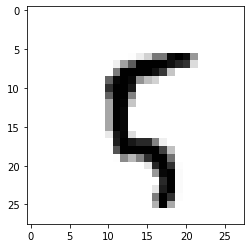

In [199]:
plt.imshow(x_train[100], cmap=plt.cm.binary)

In [200]:
print(y_train[100])

5


In [201]:
x_train.shape

(60000, 28, 28)

In [202]:
x_test.shape

(10000, 28, 28)

In [203]:
y_train.shape

(60000,)

In [204]:
y_test.shape

(10000,)

In [205]:
# 최소값, 최대값 확인
np.min(x_train), np.max(x_train), np.min(x_test), np.max(x_test)

(0, 255, 0, 255)

In [206]:
np.min(y_train), np.max(y_train), np.min(y_test), np.max(y_test)

(0, 9, 0, 9)

In [207]:
# 0~1사이 normalization수행하기

x_train_norm = x_train/np.max(x_train)
x_test_norm = x_test/np.max(x_test)
print('최소값:', np.min(x_train_norm), '최대값:', np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


In [208]:
x_train_norm.shape[0:4]

(60000, 28, 28)

In [209]:
x_train[:5].shape # x_train의 이미지를 (5, 28,28) shape로 출력하기

(5, 28, 28)

In [210]:
# hstack: height 방향의 배열을 풀어서 width 방향으로 연결
np.hstack(x_train[:5]).shape

(28, 140)

In [211]:
# transpose와 reshape를 사용해서 (28, 140)shape를 만들어
tf.reshape(tf.transpose(x_train[:5]), (28,140)).shape

TensorShape([28, 140])

In [212]:
np.reshape(tf.transpose(x_train[:5]), (28,140)).shape

(28, 140)

In [213]:
# x_train[:5] 변수를 transpose를 이용해서 (28, 5, 28)로 바꾸기
x_train[:5].transpose(1, 0, 2).shape

(28, 5, 28)

In [214]:
# reshape를 사용해서 (28, 140) shape만드시오
np.reshape(x_train[:5].transpose(1,0,2), (28,140)).shape

(28, 140)

In [215]:
x_train[:5].transpose(1,0,2).reshape(28, -1).shape # -1을 쓰면 28 뒤의 값을 모두 합쳐줄 수 있다.

(28, 140)

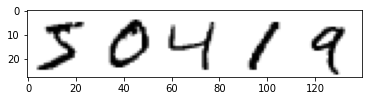

In [216]:
plt.imshow(x_train[:5].transpose(1,0,2).reshape(28, -1), cmap=plt.cm.binary)

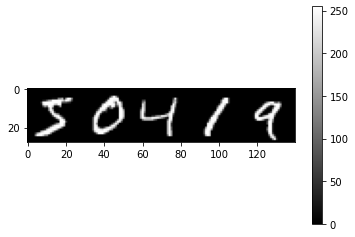

[5 0 4 1 9]


In [217]:
plt.imshow(x_train[:5].transpose(1,0,2).reshape(28, -1), cmap='gray')
plt.colorbar()
plt.show()
print(y_train[:5])

## Data Augmentation

In [218]:
# 0-1 사의의 랜덤값을 3회 출력하는 코드를 작성하시오.
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.9874892594636733
0.31358210243830753
0.5474306973727423


In [219]:
# np.random.random 함수와 shape 파라매터를 이용하여 (28, 28)의 랜덤 노이즈를 생성하는 코드를 작성하시오.
print(np.random.random((28,28)).shape)
print(np.random.random((28,28)))

(28, 28)
[[8.42089174e-01 8.50625595e-01 4.99945110e-01 9.73675021e-01
  4.32992494e-02 2.55372452e-01 5.13271702e-01 1.61902065e-01
  4.02066546e-01 6.23465843e-01 9.24797588e-01 1.42251485e-01
  1.15152819e-01 1.41355486e-01 4.97818356e-01 9.13189154e-01
  9.77009144e-01 4.24785059e-02 2.55196459e-01 8.40396272e-01
  2.89995926e-01 9.97424140e-02 2.82285562e-01 2.06808220e-01
  8.06345231e-01 9.98451986e-02 8.38843712e-01 5.41925049e-01]
 [1.92719877e-01 3.72596929e-02 9.58335934e-01 1.09663072e-01
  9.49028306e-01 8.08733612e-01 3.45046659e-01 7.88610695e-01
  7.35170474e-01 3.09839471e-01 8.78694206e-01 1.29815678e-01
  5.79981796e-01 9.61441095e-01 4.74078615e-01 7.03362449e-01
  1.22483416e-01 5.05260212e-01 4.88327809e-01 3.97339328e-01
  4.73320264e-01 6.89093937e-01 4.29306074e-01 8.50128762e-01
  1.14585199e-01 1.49500267e-01 1.09034895e-01 5.99520664e-01]
 [3.62027568e-01 8.40153684e-01 5.05431190e-01 9.68690281e-01
  1.68041582e-01 2.89516634e-01 7.29411064e-01 1.90141876e-

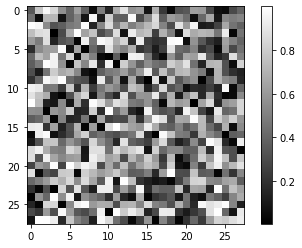

In [220]:
plt.imshow(np.random.random((28,28)), cmap='gray')
plt.colorbar()
plt.show()

In [221]:
# 가우시안 노이즈 함수를 사용하여 평균 0, 표준편차 0.1, 사이즈 1로 랜덤 값을 3번 출력하세요.
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))

[0.1087001]
[-0.05697804]
[-0.01477968]


In [222]:
print(np.random.normal(3.0,0.1,1))
print(np.random.normal(3.0,0.1,1))
print(np.random.normal(3.0,0.1,1))

[3.05150007]
[3.1811891]
[3.230143]


In [223]:
# x_train[5]와 가우시안 노이즈 (28, 28)을 더한 뒤 noisy_image 변수에 할당하는 코드를 작성하세요. mu = 0.5, std = 0.1
noisy_image = x_train_norm[5] + np.random.normal(loc=0.5,scale=0.1, size=(28,28))

In [224]:
noisy_image.shape

(28, 28)

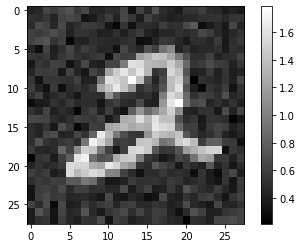

In [225]:
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()

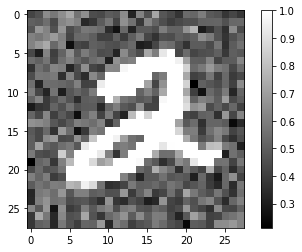

In [226]:
# max가 1을 초과하지 않게 noisy_image를 수정한 뒤 plt로 출력해보세요.
noisy_image[noisy_image>1.0]=1.0
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()

### train_noisy_image와 test_nosiy_images를 생성하는 코드를 작성하세요.

In [227]:
train_noisy_image = x_train_norm + np.random.normal(0.5,0.1, (28,28))
train_noisy_image[train_noisy_image > 1.0] = 1.0

In [228]:
test_noisy_image = x_test_norm + np.random.normal(0.5,0.1, (28,28))
test_noisy_image[test_noisy_image > 1.0] = 1.0

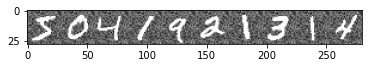

In [229]:
plt.imshow(train_noisy_image[:10].transpose((1,0,2)).reshape(28,-1), cmap='gray')

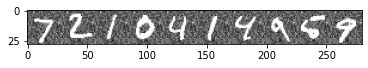

In [230]:
plt.imshow(test_noisy_image[:10].transpose((1,0,2)).reshape(28,-1), cmap='gray')

In [231]:
# train/test labels에 onehot encoding을 적용하여 shape을 (배치사이즈,) 에서 (배치사이즈, 클래스 개수)로 변경하는 코드를 작성하세요.
train_label = to_categorical(y_train, 10)
test_label = to_categorical(y_test, 10)
print(train_label.shape, test_label.shape)

(60000, 10) (10000, 10)


In [232]:
train_label.shape

(60000, 10)

In [233]:
test_label.shape

(10000, 10)

## 모델 만들기

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

In [234]:
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

inputs = Input(shape=(28, 28))
x1 = SimpleRNN(64, activation="tanh")(inputs)
x2 = Dense(10, activation="softmax")(x1)
model = Model(inputs, x2)

In [235]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                5952      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [236]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics = ["accuracy"])
hist = model.fit(train_noisy_image, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6488 - accuracy: 0.7902
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3280 - accuracy: 0.9003
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2652 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2404 - accuracy: 0.9295
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2181 - accuracy: 0.9353


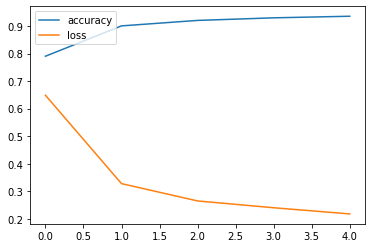

In [237]:
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['loss'], label='loss')
#plt.plot(hist.history['val_accuracy'], label='val_accuracy')
#plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [238]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

idx = 0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.03734944 0.04781098 0.0046355  0.00296971 0.03778369 0.00677845
 0.01364268 0.50487167 0.00199626 0.34216166]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7
